In [1]:
import pandas as pd
import numpy as my
from matplotlib import pyplot as plt
import seaborn as sns

## Data Cleaning

In [84]:
# read in all listings csv
df = pd.read_csv('./datasets/nairobi_all_listings.csv')

In [85]:
df.shape

(4000, 10)

In [86]:
# checking data types; need to convert beds, baths, sq_ft_price, price_KES to numeric data type
df.dtypes

id               int64
category        object
list_type       object
beds            object
baths           object
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [87]:
# confirming any nulls
df.isnull().sum()

id              0
category        0
list_type       0
beds            0
baths           0
sq_ft_price     0
price_KES       0
district        0
neighborhood    0
street          8
dtype: int64

In [88]:
df.head()

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street
0,3394167,Flat & Apartment,For Rent,2,None,None,120000,Westlands,Brookside,None
1,3399035,Flat & Apartment,For Rent,2,None,77,96000,Ridgeways,None,None
2,3433894,Flat & Apartment,For Rent,2,None,46,70000,Dagoretti North,Valley Arcade,Lavington
3,3433821,Flat & Apartment,For Rent,2,2,None,200000,Westlands,Westlands Area,Kingfisher Nest
4,3433777,Flat & Apartment,For Rent,4,None,None,110000,Westlands,Parklands,1St Parklands


In [89]:
# impute nulls values with 0
df['beds'].replace('None', 0, inplace=True)

In [90]:
# convert beds column to numeric datatype
df["beds"] = pd.to_numeric(df["beds"])

In [91]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths           object
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [92]:
# impute nulls values with 0
df['baths'].replace('None', 0, inplace=True)

In [93]:
# convert baths column to numeric datatype
df["baths"] = pd.to_numeric(df["baths"])

In [94]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths            int64
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [95]:
# impute nulls values with 0
df['sq_ft_price'].replace('None', 0, inplace=True)

In [96]:
# convert sq_ft_price column to numeric datatype 
df["sq_ft_price"] = pd.to_numeric(df["sq_ft_price"])

In [97]:
# impute nulls values with 0
df['price_KES'].replace('None', 0, inplace=True)

In [98]:
# convert price_KES column to numeric datatype 
df["price_KES"] = pd.to_numeric(df["price_KES"])

In [99]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths            int64
sq_ft_price      int64
price_KES        int64
district        object
neighborhood    object
street          object
dtype: object

In [100]:
# create new column to convert KES price to USD
# conversion rate from extraction date May 8, 2020
df['price_USD'] = df['price_KES'] / 106.06

In [101]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street,price_USD
0,3394167,Flat & Apartment,For Rent,2,0,0,120000,Westlands,Brookside,None,1131.435037
1,3399035,Flat & Apartment,For Rent,2,0,77,96000,Ridgeways,None,None,905.148029
2,3433894,Flat & Apartment,For Rent,2,0,46,70000,Dagoretti North,Valley Arcade,Lavington,660.003771


In [102]:
# create new column to convert KES sq_ft_price to USD
# conversion rate from extraction date May 8, 2020
df['sq_ft_price_USD'] = df['sq_ft_price'] / 106.06

In [103]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street,price_USD,sq_ft_price_USD
0,3394167,Flat & Apartment,For Rent,2,0,0,120000,Westlands,Brookside,None,1131.435037,0.000000
1,3399035,Flat & Apartment,For Rent,2,0,77,96000,Ridgeways,None,None,905.148029,0.726004
2,3433894,Flat & Apartment,For Rent,2,0,46,70000,Dagoretti North,Valley Arcade,Lavington,660.003771,0.433717


In [104]:
# reorder columns 
df[['id', 'category', 'list_type', 'beds', 'baths', 
    'sq_ft_price', 'sq_ft_price_USD', 'price_KES', 'price_USD',
    'district', 'neighborhood', 'street']]

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington
3,3433821,Flat & Apartment,For Rent,2,2,0,0.000000,200000,1885.725061,Westlands,Westlands Area,Kingfisher Nest
4,3433777,Flat & Apartment,For Rent,4,0,0,0.000000,110000,1037.148784,Westlands,Parklands,1St Parklands
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3400085,Flat & Apartment,For Sale,3,4,11476,108.202904,18900000,178201.018292,Dagoretti North,Kileleshwa,Kileleshwa
3996,3403249,Flat & Apartment,For Sale,3,0,0,0.000000,19000000,179143.880822,Dagoretti North,Kilimani,None
3997,3400575,Studio,For Sale,1,1,8361,78.832736,3600000,33943.051103,Dagoretti North,Kileleshwa,Kileleshwa
3998,3386205,Flat & Apartment,For Sale,2,2,0,0.000000,7950000,74957.571186,Ngong Road,None,None


In [105]:
# save changes made to csv
df.to_csv('./datasets/nairobi_all_listings')

## Exploratory Data Analysis

### Rental Data

In [106]:
# import cleaned csv of locations
df = pd.read_csv('./datasets/nairobi_all_listings_clean.csv')

In [107]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None,WESTLANDS,SPRING VALLEY,-1.256163,36.791940
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None,WESTLANDS,MUTHAIGA,-1.230687,36.849247
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington,WESTLANDS,MAZIWA,-1.290723,36.769157


In [108]:
df_rent= df[(df.list_type == 'For Rent')]

In [109]:
df_rent

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None,WESTLANDS,SPRING VALLEY,-1.256163,36.791940
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None,WESTLANDS,MUTHAIGA,-1.230687,36.849247
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington,WESTLANDS,MAZIWA,-1.290723,36.769157
3,3433821,Flat & Apartment,For Rent,2,2,0,0.000000,200000,1885.725061,Westlands,Westlands Area,Kingfisher Nest,WESTLANDS,SPRING VALLEY,-1.258453,36.804754
4,3433777,Flat & Apartment,For Rent,4,0,0,0.000000,110000,1037.148784,Westlands,Parklands,1St Parklands,WESTLANDS,MUTHAIGA,-1.263270,36.815948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,3425932,Flat & Apartment,For Rent,3,3,72,0.678861,140000,1320.007543,Westlands,Westlands Area,Cedar Road,WESTLANDS,MUTHANGARI,-1.267686,36.797797
1777,3430185,Flat & Apartment,For Rent,3,4,0,0.000000,120000,1131.435037,Dagoretti North,Kilimani,NaN,WESTLANDS,KILIMANI,-1.289279,36.786931
1778,3429123,Flat & Apartment,For Rent,1,2,85,0.801433,110000,1037.148784,Dagoretti North,Lavington,Gitanga Road,WESTLANDS,MAZIWA,-1.289890,36.768148
1779,3429516,Flat & Apartment,For Rent,3,4,0,0.000000,100000,942.862531,Dagoretti North,Kileleshwa,None,WESTLANDS,KILELESHWA,-1.280739,36.781686


In [110]:
df_rent['County'].value_counts()

WESTLANDS    1691
LANG'ATA       35
KASARANI       27
STAREHE        13
KIBRA           7
DAGORETTI       4
EMBAKASI        3
KAMUKUNJI       1
Name: County, dtype: int64

In [111]:
df_rent['SubCounty'].value_counts()

KILIMANI           435
MUTHANGARI         296
MUTHAIGA           224
KILELESHWA         171
SPRING VALLEY      159
LAVINGTON          115
KITISURU            71
MAZIWA              66
LORESHO             61
MT VIEW             48
HIGHRIDGE           43
KAREN               25
SOUTH B              9
ROYSAMBU             7
GARDEN ESTATE        6
KAHAWA WEST          5
NAIROBI WEST         5
JAMHURI              4
KASARANI             4
LANG'ATA             3
KIBERA               2
RIRUTA               2
SOUTH C              2
IMARA DAIMA          2
CITY SQUARE          1
EMBAKASI             1
KAWANGWARE           1
MWIKI                1
CITY CENTRE          1
CLAY CITY            1
KARURA               1
KANGEMI CENTRAL      1
NYAYO                1
GITHURAI             1
NGARA EAST           1
BURUBURU             1
GOLF COURSE          1
RUARAKA              1
PANGANI              1
UTHIRU               1
Name: SubCounty, dtype: int64

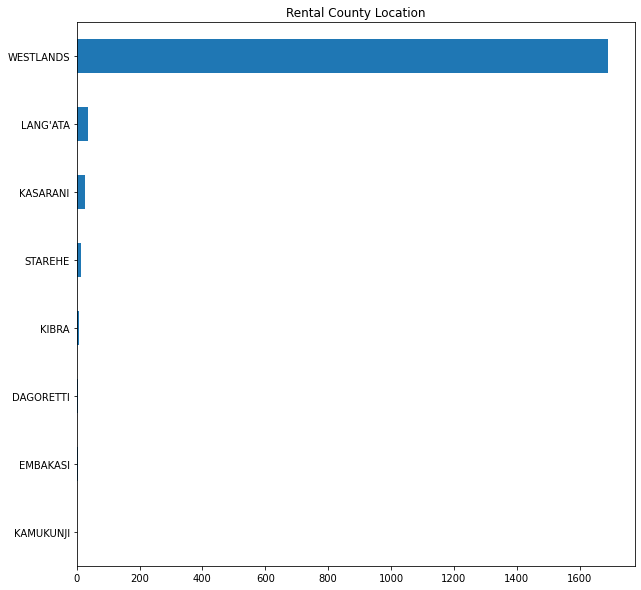

In [133]:
# created bar chart to visualize county locations
df_rent['County'].value_counts(ascending=True).plot(figsize= (10,10), fontsize=10,
            title= 'Rental County Location',
            legend=None, 
            kind='barh')

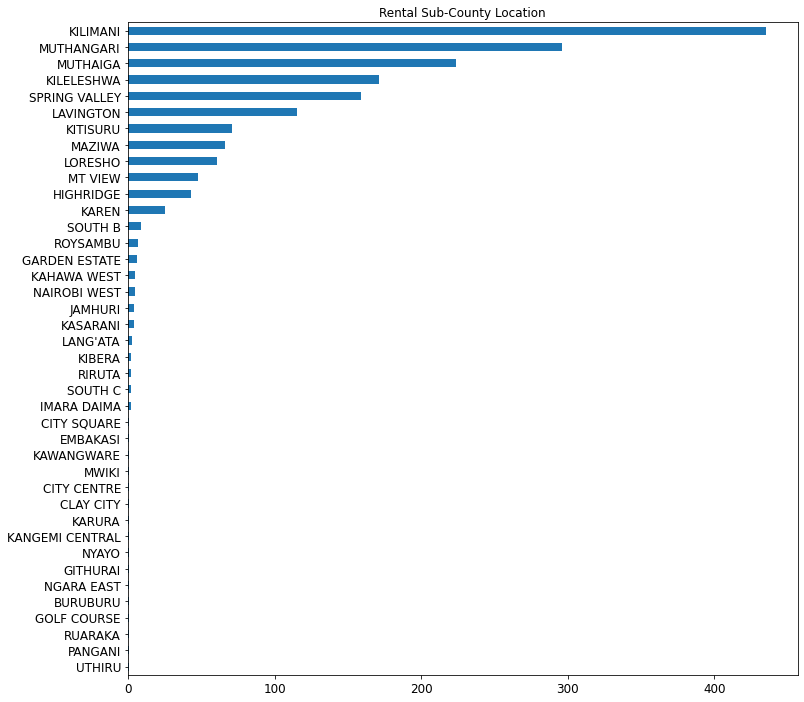

In [132]:
# created bar chart to visualize Sub-County locations
df_rent['SubCounty'].value_counts(ascending=True).plot(figsize= (12,12), fontsize=12,
            title= 'Rental Sub-County Location',
            legend=None, 
            kind='barh')

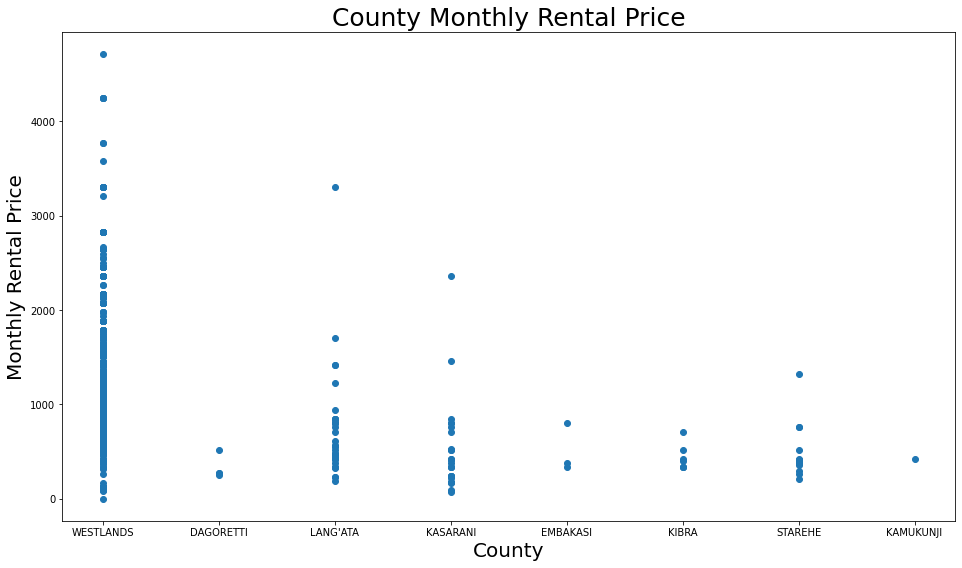

In [114]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of SubCounty location and price.
plt.scatter(df_rent['County'],
            df_rent['price_USD']);

plt.title("County Monthly Rental Price", fontsize= 25)
plt.ylabel("Monthly Rental Price", fontsize = 20)
plt.xlabel("County", fontsize = 20);

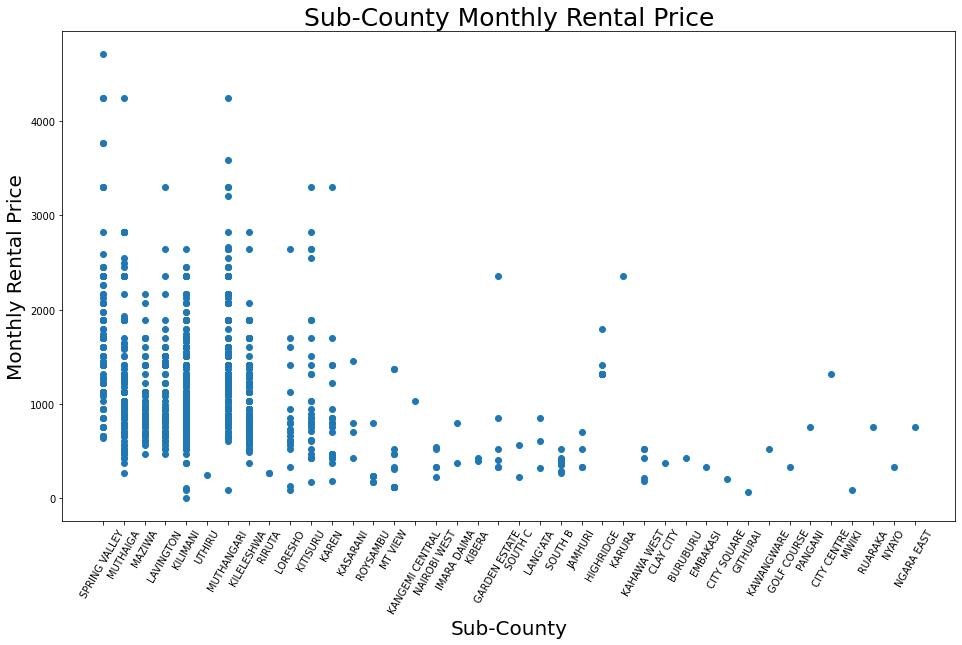

In [115]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of SubCounty location and price.
plt.scatter(df_rent['SubCounty'],
            df_rent['price_USD']);

plt.title("Sub-County Monthly Rental Price", fontsize= 25)
plt.ylabel("Monthly Rental Price", fontsize = 20)
plt.xticks(rotation=60)
plt.xlabel("Sub-County", fontsize = 20);

### Sale Data

In [116]:
df_sale = df[(df.list_type == 'For Sale')]

In [117]:
df_sale.head()

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
1781,3428432,Flat & Apartment,For Sale,3,2,0,0.000000,18000000,169715.25550,Dagoretti North,Kileleshwa,Hamisi Road,WESTLANDS,KILELESHWA,-1.280739,36.781686
1782,3433663,Studio,For Sale,1,1,0,0.000000,2000000,18857.25061,Dagoretti North,Naivasha Road,None,WESTLANDS,MT VIEW,-1.272926,36.731603
1783,3433810,Flat & Apartment,For Sale,3,4,7548,71.167264,13000000,122572.12900,Dagoretti North,Kilimani,Kilungu Road,WESTLANDS,KILIMANI,-1.294029,36.777502
1784,3433808,Studio,For Sale,1,1,10839,102.196870,3500000,33000.18857,Dagoretti North,Kilimani,Dennis Pritt,WESTLANDS,KILIMANI,-1.285543,36.788115
1785,3433877,Flat & Apartment,For Sale,3,3,0,0.000000,15500000,146143.69220,Westlands,Parklands,None,WESTLANDS,MUTHAIGA,-1.259882,36.817892


In [118]:
df_sale['County'].value_counts()

WESTLANDS    1655
KASARANI       41
LANG'ATA       32
STAREHE        32
KIBRA          24
EMBAKASI       16
DAGORETTI      12
KAMUKUNJI       7
Name: County, dtype: int64

In [119]:
df_sale['SubCounty'].value_counts()

KILIMANI           699
KILELESHWA         355
LAVINGTON          160
MUTHAIGA           115
MUTHANGARI         103
SPRING VALLEY       84
MAZIWA              83
KITISURU            31
JAMHURI             15
KASARANI            14
MT VIEW             14
SOUTH C             13
IMARA DAIMA         13
KAHAWA WEST         13
SOUTH B             12
PANGANI             10
RIRUTA               9
LORESHO              9
KIBERA               9
LANG'ATA             9
NGARA EAST           8
NAIROBI WEST         6
BURUBURU             6
CLAY CITY            5
GARDEN ESTATE        4
UTHIRU               3
NYAYO                3
DONHOLM              2
KANGEMI CENTRAL      2
KAREN                2
CITY CENTRE          1
RUARAKA              1
UTAWALA              1
HIGHRIDGE            1
CALIFORNIA           1
CITY SQUARE          1
GITHURAI             1
HARDY                1
Name: SubCounty, dtype: int64

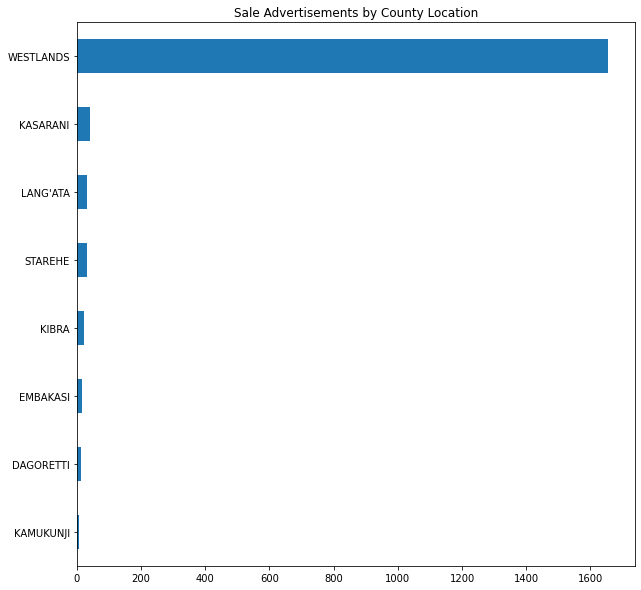

In [131]:
# created bar chart to visualize county locations
df_sale['County'].value_counts(ascending=True).plot(figsize= (10,10), fontsize=10,
            title= 'Sale Advertisements by County Location',
            legend=None, 
            kind='barh')

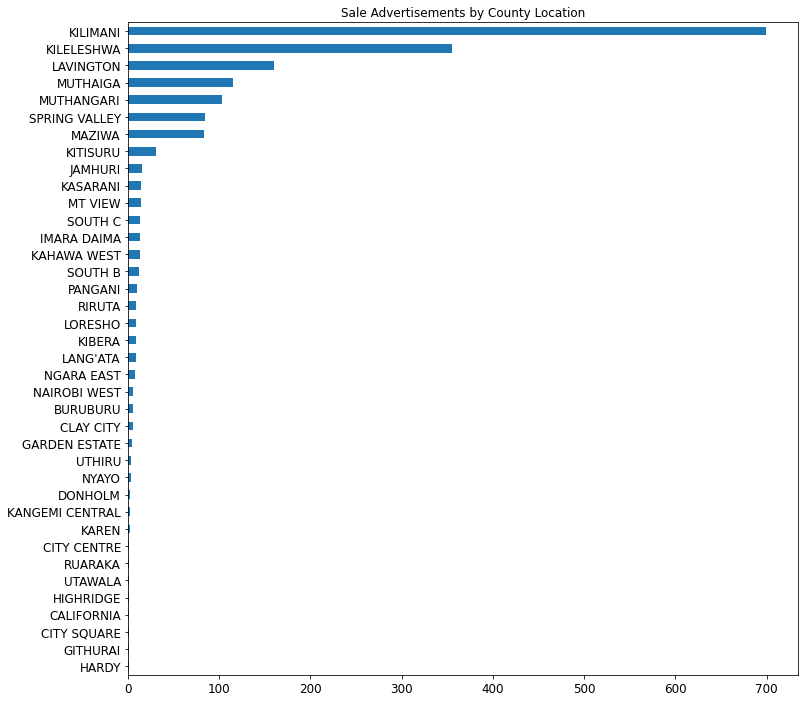

In [130]:
# created bar chart to visualize Sub-County locations
df_sale['SubCounty'].value_counts(ascending=True).plot(figsize= (12,12), fontsize=12,
            title= 'Sale Advertisements by County Location',
            legend=None, 
            kind='barh')

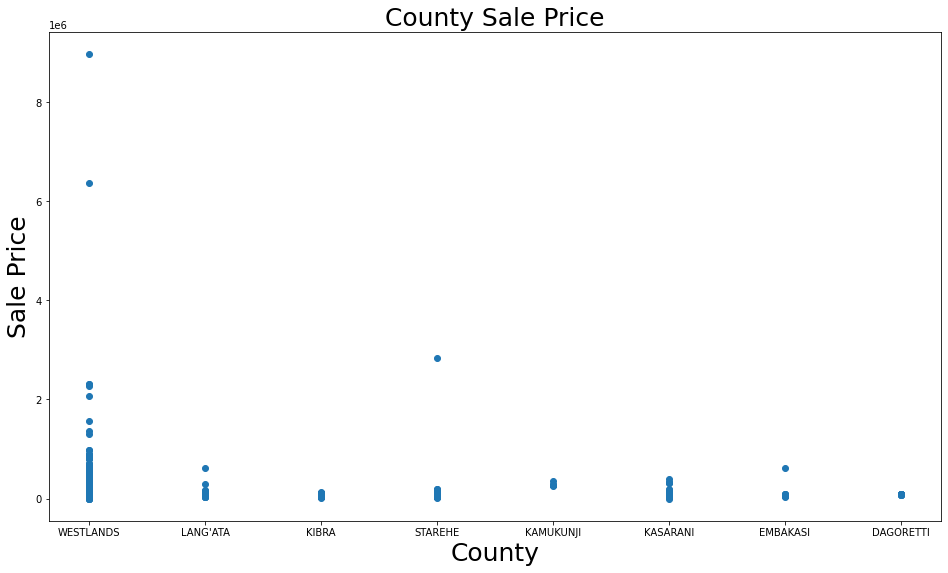

In [129]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of County location and price.
plt.scatter(df_sale['County'],
            df_sale['price_USD']);

plt.title("County Sale Price", fontsize= 25)
plt.ylabel("Sale Price", fontsize = 25)
plt.xlabel("County", fontsize = 25);

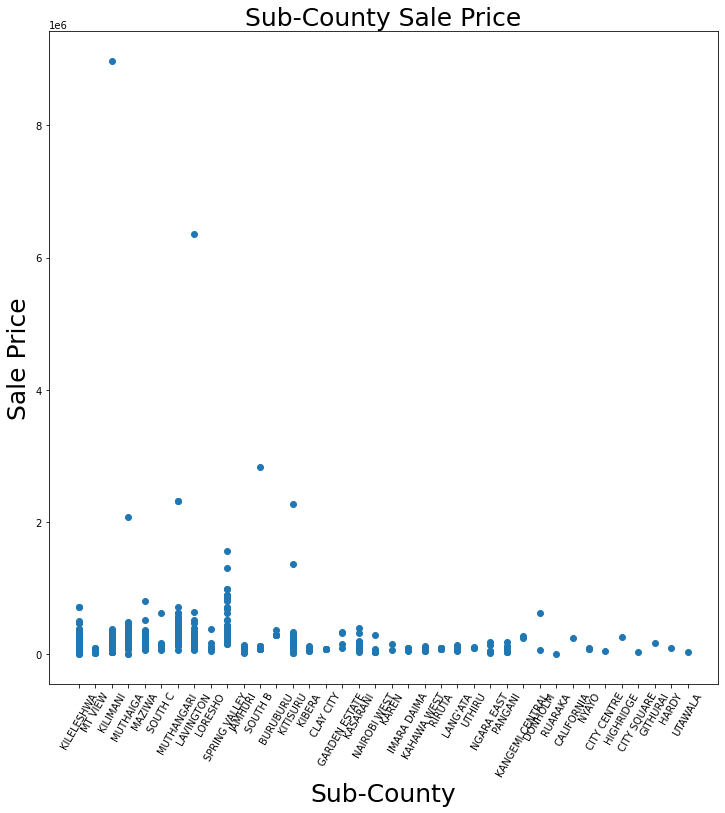

In [127]:
# set figure size
plt.figure(figsize=(12, 12))

# create scatterplot of County location and price.
plt.scatter(df_sale['County'],
            df_sale['price_USD']);

plt.title("County Sale Price", fontsize= 25)
plt.ylabel("Sale Price", fontsize = 25)
plt.xticks(rotation=60)
plt.xlabel("County", fontsize = 25);